In [8]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [9]:
# Code starts here

train = pd.read_csv('../data/train.csv')
train.head()

# Code ends here

,Id,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,...,attr1080,attr1081,attr1082,attr1083,attr1084,attr1085,attr1086,attr1087,attr1088,attr1089
0,2216,2216,-4.374765,13.819856,14.656331,-9.728919,-19.334897,0.344455,11.10572,21.977302,...,89.083581,86.194838,93.162055,100.883355,123.558503,112.831384,100.583377,102.194939,120.306692,0
1,2673,2673,-13.796261,-4.647589,21.676617,-0.122074,11.228644,-8.806895,-9.16119,18.025709,...,100.750899,83.373142,76.902208,72.182997,102.843819,93.118477,80.338570,80.196648,93.995657,0
2,5603,5603,-2.115400,-3.332400,-6.640000,-13.825000,4.123200,27.365000,6.70020,3.783000,...,52.917000,34.799000,42.562000,51.161000,77.139000,73.367000,50.733000,39.949000,60.731000,0
3,6401,6401,-25.531000,66.699000,-13.025000,-31.198000,12.016000,19.365000,5.04510,20.418000,...,49.488000,71.633000,66.757000,69.213000,97.606000,81.416000,53.808000,41.489000,71.825000,0
4,6043,6043,18.993000,-5.620000,-9.964900,3.307200,0.999760,-10.920000,-11.39200,3.918500,...,84.508000,89.976000,61.169000,33.132000,58.043000,54.522000,80.941000,53.000000,80.615000,1


In [11]:
X = train.drop(['Id','Unnamed: 0','attr1089'],axis = 1)
y = train['attr1089'].copy()

### Visualize the data

- Check the distribution of the target variable. Is the data imbalanced?
- Clean the data, apply some data preprocessing and engineering techniques.

1    3080
0    2812
Name: attr1089, dtype: int64


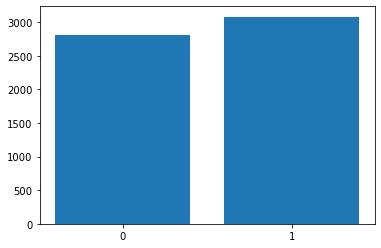

In [12]:
# Code starts here
#Storing value counts of target variable in 'fully_paid'
crater_count = y.value_counts()
print(y.value_counts())

#Plotting bar plot
plt.bar(crater_count.index, crater_count, tick_label = [1,0])
plt.show()

# Standardize the data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


# Code ends here.

### Model building

- Split the data into train and test.
- Now let's come to the actual task, predict the values of `attr1089` after building a Machine learning model.
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score))

In [13]:
# Code Starts here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Initialize the logistic regression
lr = LogisticRegression()

# Fit the model 
lr.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = lr.predict(X_test)

# roc score
roc_score = roc_auc_score(y_pred,y_test)
print(roc_score)

0.8260211041050057


In [14]:
# Can we improve our model's performance with Decision Tree algorithm?

# Initialize decision tree
dt = DecisionTreeClassifier(random_state = 4)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.8666157372039724


In [15]:
# Can we improve our model's performance with Random forrest algorithm?

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(random_state=4)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.920244461420932


In [16]:
# Bagginng or Bootstrap aggregation

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred = bagging_clf.predict(X_test)

# accuracy 
print(bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred)
print(score_bagging)

0.8359728506787331
0.8339190221543163


In [17]:
# Voting Classifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='hard')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)
print(hard_voting_score)

0.9078054298642534


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [19]:
# Code Starts here

test = pd.read_csv('../data/test.csv')

id_ = test['Id'].copy()

test = test.drop(['Id','Unnamed: 0'],1)

res = rfc.predict(test)
res

# sample = pd.read_csv('sample_submission.csv')

# sample['Id'] = id_
# sample['attr1089'] = res

# submission = sample.to_csv('submission.csv', index = False)
# Code ends here

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)